
# CPSC380: 4_Visualization_6_Image

A short tutorial on plotting images with Matplotlib.

Link:  
 - https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)


## Importing image data into Numpy arrays

Matplotlib relies on the Pillow_ library to load image data.


Here's the image we're going to play with:

<img src="stinkbug.png">

It's a 24-bit RGB PNG image (8 bits for each of R, G, B).  Depending
on where you get your data, the other kinds of image that you'll most
likely encounter are RGBA images, which allow for transparency, or
single-channel grayscale (luminosity) images.

In [3]:
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png')
print("Image shape: ", img.shape)
print("The first pixel: ", img[0,0,:],"\n")
print(img[0, :5,:])

C:\Users\dche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  """Entry point for launching an IPython kernel.


Image shape:  (375, 500, 3)
The first pixel:  [0.40784314 0.40784314 0.40784314] 

[[0.40784314 0.40784314 0.40784314]
 [0.40784314 0.40784314 0.40784314]
 [0.40784314 0.40784314 0.40784314]
 [0.4117647  0.4117647  0.4117647 ]
 [0.4117647  0.4117647  0.4117647 ]]


## Plotting numpy arrays as images

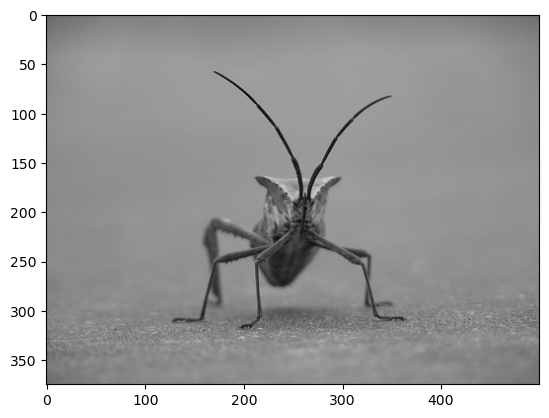

In [4]:
imgplot = plt.imshow(img)

You can also plot any numpy array.


### Applying pseudocolor schemes to image plots

Pseudocolor can be a useful tool for enhancing contrast and
visualizing your data more easily.  This is especially useful when
making presentations of your data using projectors - their contrast is
typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity
images.  We currently have an RGB image.  Since R, G, and B are all
similar (see for yourself above or in your data), we can just pick one
channel of our data:

Pseudo-color processing is a technique that **maps each of the grey levels of a black and white image into an assigned color**. A typical example for the use of pseudo color is **thermography (thermal imaging)**, where infrared cameras feature only one spectral band and show their grayscale images in pseudo color. 



Image shape:  (375, 500)
The first pixel:  0.40784314 



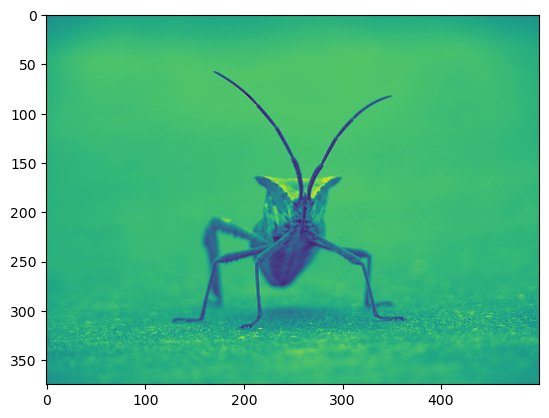

In [5]:
lum_img = img[:, :, 0] # here 0 means the first channel 0, [1, 2]
print("Image shape: ", lum_img.shape)
print("The first pixel: ", lum_img[0,0],"\n")
#print(lum_img)

plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table,
LUT), is applied.  The default is called viridis.  There are plenty of
others to choose from.

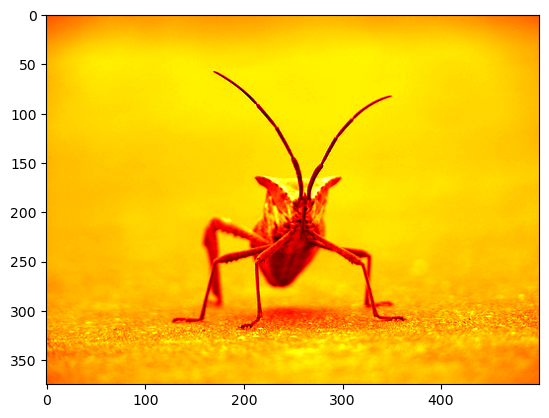

In [6]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using `set_cmap` method:



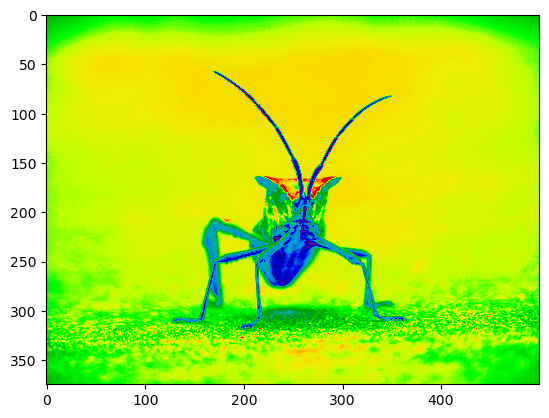

In [7]:
imgplot = plt.imshow(lum_img)
#imgplot.set_cmap('nipy_spectral')

plt.imshow(lum_img, cmap =('nipy_spectral'))

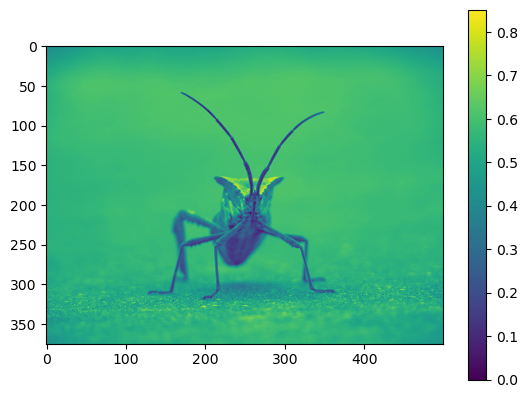

In [8]:
# adding color bar
imgplot = plt.imshow(lum_img)
plt.colorbar()


### Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand
the contrast in a particular region while sacrificing the detail in
colors that don't vary much, or don't matter.  A good tool to find
interesting regions is the histogram.  To create a histogram of our
image data, we use the :func:`~matplotlib.pyplot.hist` function.



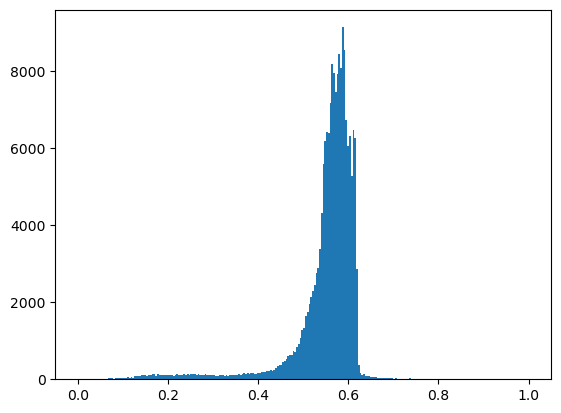

In [22]:
# numpy.ravel(a, order='C')[source]
# ravel: Return a contiguous flattened array

hist=plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0))

Most often, **the "interesting" part of the image is around the peak**,
and you can get extra contrast by clipping the regions above and/or
below the peak.  In our histogram, it looks like there's not much
useful information in the high end (not many white things in the
image).  

Let's adjust the upper limit, so that we effectively "zoom in
on" part of the histogram.  We do this by passing the clim argument to
imshow.  You could also do this by calling the
:meth:`~matplotlib.cm.ScalarMappable.set_clim` method of the image plot
object, but make sure that you do so in the same cell as your plot
command when working with the Jupyter Notebook - it will not change
plots from earlier cells.

You can specify the clim in the call to ``plot``.



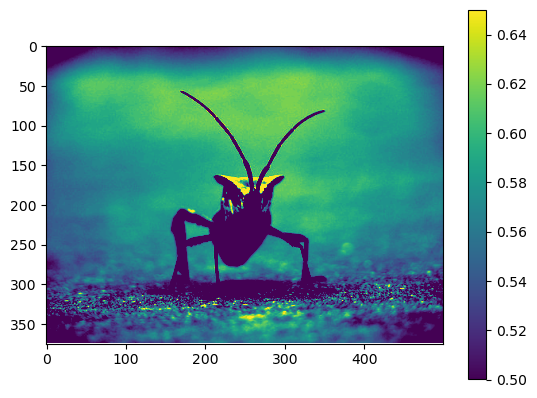

In [26]:
# clim: color limit
#imgplot = plt.imshow(lum_img, clim=(0, 10))
#imgplot = plt.imshow(lum_img, clim=(0, 1))
imgplot = plt.imshow(lum_img, clim=(0.4, 0.7))
imgplot = plt.imshow(lum_img, clim=(0.5, 0.65))

plt.colorbar()

You can also specify the clim using the returned object



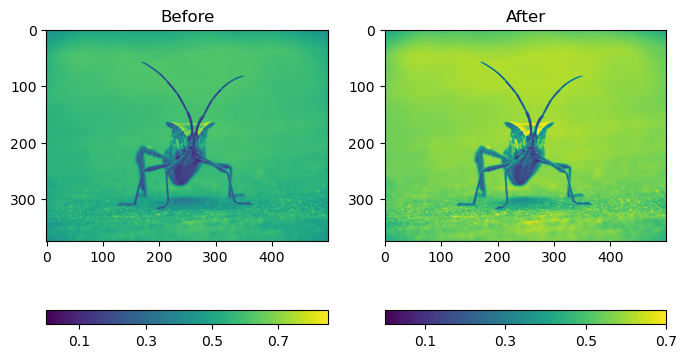

In [11]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

### Array Interpolation schemes

<class 'PIL.PngImagePlugin.PngImageFile'> (48, 64, 3)


C:\Users\dche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  after removing the cwd from sys.path.


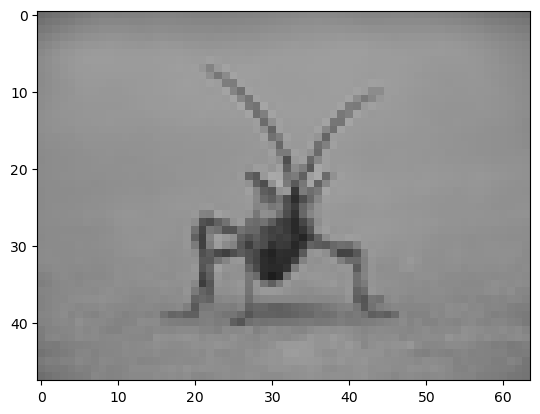

In [36]:
from PIL import Image

img = Image.open('stinkbug.png')          # PIL.PngImagePlugin.PngImageFile
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)
print (type(img), np.array(img).shape)


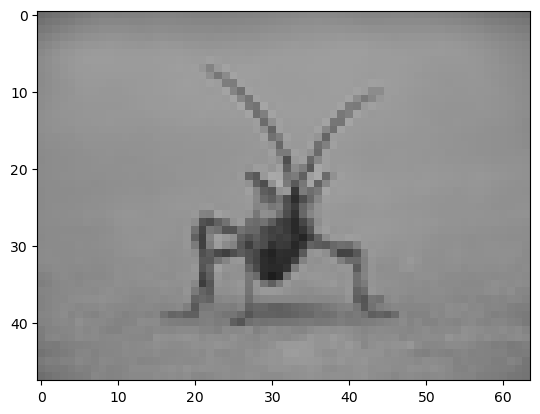

In [13]:
imgplot = plt.imshow(img, interpolation="nearest")

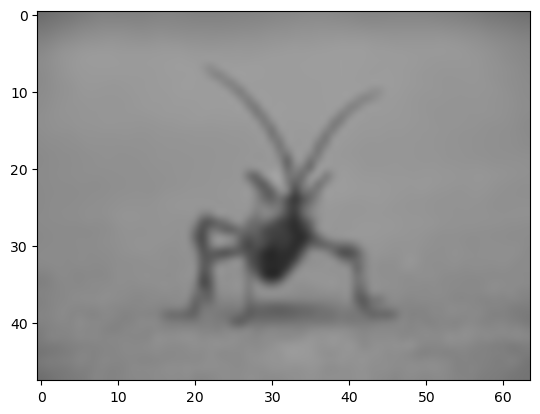

In [14]:
# Bicubic interpolation is often used when blowing up photos 
# - people tend to prefer blurry over pixelated.
imgplot = plt.imshow(img, interpolation="bicubic")

**Image interpolation**:
occurs when you resize or distort your image from one pixel grid to another. 

Image resizing is necessary when you need to increase or decrease the total number of pixels, whereas remapping can occur when you are correcting for lens distortion or rotating an image.

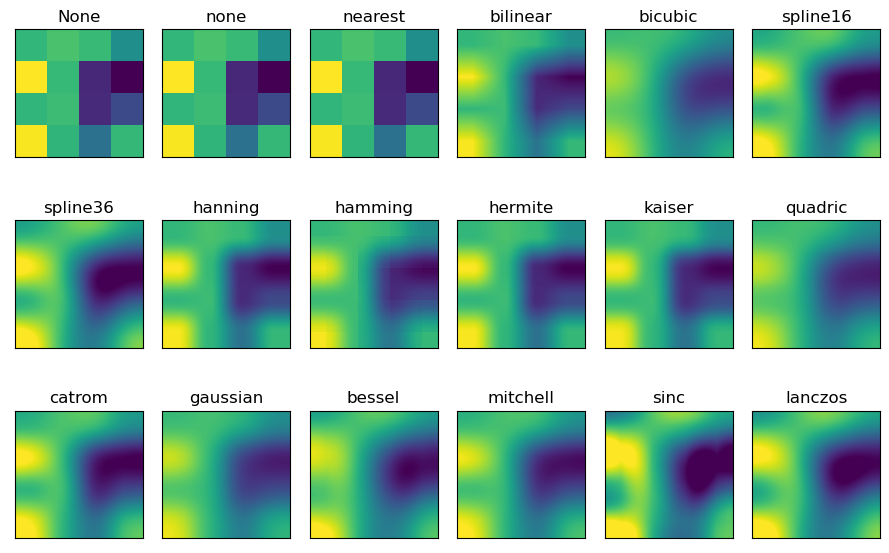

In [37]:
# sourece: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

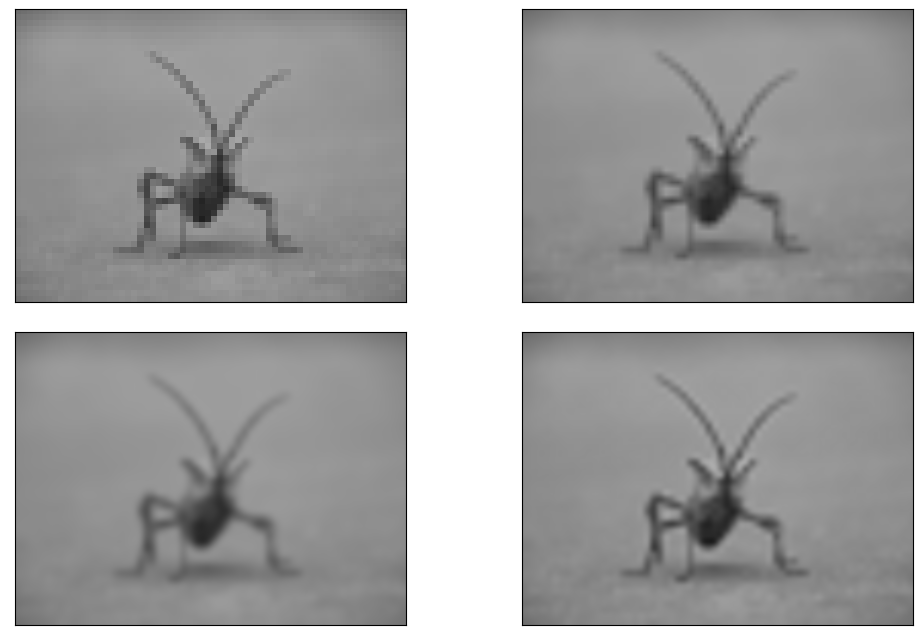

In [52]:
# subplots

img = Image.open('stinkbug.png')          # PIL.PngImagePlugin.PngImageFile
img.thumbnail((64, 64))

methods = ['nearest', 'bilinear', 'bicubic', 'spline16']


fig, ax = plt.subplots(2, 2, figsize=(12,8))
fig.subplots_adjust(hspace=0.1, wspace=0.2)
#print (fig, ax)

for i , ax in enumerate(ax.flat):
        imgplot = ax.imshow(img, interpolation=methods[i], clim=(0.5, 0.65))
        ax.set(xticks=[], yticks=[])

## Person images

In [58]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=6)

# print out dataset information
print(len(faces.target_names), faces.target_names[:5], faces.target_names[54])
print(faces.images.shape)                  # (5425, 62, 47): 5225 images, each with the size (62, 47)
print(faces.target[:10])      # integer values corresponding to its name

311 ['Abdullah Gul' 'Adrien Brody' 'Al Gore' 'Al Sharpton' 'Albert Costa'] Colin Powell
(5425, 62, 47)
[ 54 183 151 183  79 195 268  79  54 106]


In [60]:
# the first image information
print(faces.images[0].shape)
print(faces.images[0, :3, :10])  # print the first image's top left corner (:3, :10)

(62, 47)
[[114.666664 110.333336 117.666664 184.       229.66667  230.
  225.66667  209.33333  194.66667  191.      ]
 [113.666664 112.333336 143.66667  207.33333  230.       230.66667
  222.66667  200.33333  192.       193.66667 ]
 [114.333336 116.333336 168.33333  223.33333  233.66667  227.
  206.66667  188.       194.33333  198.33333 ]]


Text(0.5, 0, 'Colin Powell')

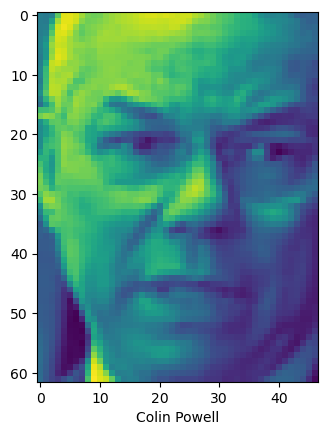

In [18]:
# display the first image
plt.imshow(faces.images[0])
plt.xlabel(faces.target_names[faces.target[0]])

Let's plot a few of these faces to see what we're working with:

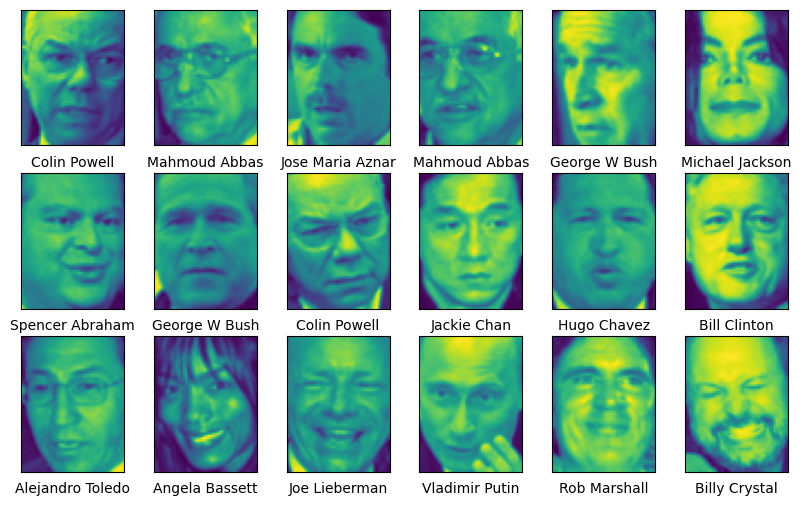

In [62]:
fig, ax = plt.subplots(3, 6, figsize=(10,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i]) # , cmap='bone'
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
    #axi.set(xlabel=faces.target_names[faces.target[i]])

## cmap in imshow

**Note**: When img has shape (M,N,3) or (M,N,4), the values in img are interpreted as RGB or RGBA values. In this case the cmap is ignored. However, **if img were an array of shape (M,N), then the cmap controls the colormap used to display the values**.

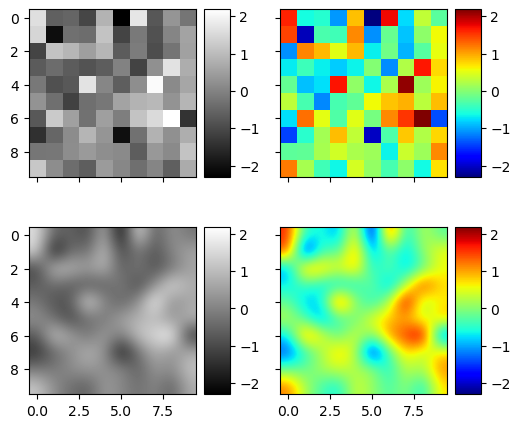

In [67]:

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
np.random.seed(1)

data = np.random.randn(10, 10)

fig = plt.figure(figsize=(8, 5))
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(2, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

# the top-left one (gray)
im0 = grid[0].imshow(data, cmap='gray', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)

# the top-right one (color)
im1 = grid[1].imshow(data, cmap='jet', interpolation='nearest') 
grid.cbar_axes[1].colorbar(im1)
plt.savefig('test.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)

# the bottom-left one (gray)
im0 = grid[2].imshow(data, cmap='gray', interpolation='bicubic')
grid.cbar_axes[2].colorbar(im0)

# the bottom-right one (color)
im1 = grid[3].imshow(data, cmap='jet', interpolation='bicubic') 
grid.cbar_axes[3].colorbar(im1)
plt.savefig('test.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)